In [1]:
import momepy as mm
import geopandas as gpd
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import libpysal
import numpy as np
import shapely
from scipy.spatial import Voronoi
from shapely.geometry.base import BaseGeometry
from shapely.ops import polygonize
from tqdm.auto import tqdm

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path = '/home/jovyan/private/Thesis/Accra/GOB/'
path_1 = '/home/jovyan/private/Thesis/Accra/streets/'
path_2 = '/home/jovyan/private/Thesis/Accra/tessellation/'

In [6]:
Acc_BF = gpd.read_file(path + 'Accra_BF_W_H.shp')

centroids_dgf = gpd.read_file(path + 'Accra_ROI_BF_CentV2.shp') 

streets_gdf = gpd.read_file(path_1 + 'Accra_Streets_ROI.shp')

In [7]:
Acc_BF.head()

Join_Count  TARGET_FID  latitude  longitude  area_in_me  confidence  \
0           1           0  5.690601  -0.367710      9.3122      0.6959   
1           1           1  5.774509  -0.053495     70.8945      0.7786   
2           1           2  5.659148  -0.329165    134.3206      0.9137   
3           1           3  5.656320  -0.103304     50.4452      0.7740   
4           1           4  5.705059  -0.282356    139.7696      0.8939   

      full_plus_        layer  \
0  6CQXMJRJ+6WV3  Accra_GOBF1   
1  6CQXQWFW+RJ26  Accra_GOBF1   
2  6CQXMM5C+M84W  Accra_GOBF1   
3  6CQXMV4W+GMGM  Accra_GOBF1   
4  6CQXPP49+23C8  Accra_GOBF1   

                                                path  wsf_accra1  \
0  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          20   
1  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...       -9999   
2  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          25   
3  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          57   
4  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          33   

                                            geometry  
0  POLYGON ((-0.36769 5.69059, -0.36772 5.69059, ...  
1  POLYGON ((-0.05344 5.77453, -0.05351 5.77445, ...  
2  POLYGON ((-0.32911 5.65909, -0.32918 5.65907, ...  
3  POLYGON ((-0.10326 5.65629, -0.10334 5.65629, ...  
4  POLYGON ((-0.28228 5.70508, -0.28231 5.70500, ...

In [8]:
Acc_BF.shape, Acc_BF.crs

((2345222, 11),
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [9]:
# Convert the CRS of df to EPSG:32737
Acc_BF = Acc_BF.to_crs(epsg=32630)
Acc_BF.crs

<Derived Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
centroids_dgf.head()

latitude  longitude  area_in_me  confidence     full_plus_        layer  \
0  5.483128  -0.401463     40.8493      0.7071  6CQXFHMX+7C32  Accra_GOBF1   
1  5.503012  -0.402175     91.8811      0.8794  6CQXGH3X+644F  Accra_GOBF1   
2  5.505089  -0.403129    110.0101      0.8273  6CQXGH4W+2PQH  Accra_GOBF1   
3  5.495391  -0.400987     24.3919      0.6831  6CQXFHWX+5J2M  Accra_GOBF1   
4  5.492515  -0.401922    277.1684      0.9008  6CQXFHVX+264G  Accra_GOBF1   

                                                path  ORIG_FID  WSF_Accra_  \
0  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      2157           6   
1  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      3004           2   
2  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      5591           3   
3  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      5776           3   
4  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      7207           3   

   wsf_accra1  A_3D  WSF3D_A  WSF3D_A_1  wsf_h                       geometry  
0          58    24       24         58     58  POINT (787935.466 606693.192)  
1          21    28       28         21     21  POINT (787846.928 608893.014)  
2          33    21       21         33     33  POINT (787740.128 609122.430)  
3          26    26       26         26     26  POINT (787982.273 608050.275)  
4          28    27       27         28     28  POINT (787880.057 607731.604)

In [11]:
centroids_dgf.shape, centroids_dgf.crs

((2345222, 15),
 <Derived Projected CRS: EPSG:32630>
 Name: WGS 84 / UTM zone 30N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
 - bounds: (-6.0, 0.0, 0.0, 84.0)
 Coordinate Operation:
 - name: UTM zone 30N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [12]:
streets_gdf.head()

fid_1                                           geometry
0  395997.0  LINESTRING (787908.039 606717.341, 787853.501 ...
1  676922.0  LINESTRING (787908.039 606717.341, 787919.823 ...
2  648743.0  LINESTRING (788205.663 606394.827, 788267.438 ...
3  683465.0  LINESTRING (788682.505 606444.169, 788733.588 ...
4  651231.0  LINESTRING (789451.882 606794.960, 789472.075 ...

In [13]:
streets_gdf.shape, streets_gdf.crs

((114384, 2),
 <Derived Projected CRS: EPSG:32630>
 Name: WGS 84 / UTM zone 30N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
 - bounds: (-6.0, 0.0, 0.0, 84.0)
 Coordinate Operation:
 - name: UTM zone 30N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [14]:
len(centroids_dgf),len(Acc_BF)

(2345222, 2345222)

In [15]:
#assign a new index from 0 to length of street data -1
Acc_BF["uID"] = range(len(Acc_BF))


centroids_dgf["uID"] = range(len(centroids_dgf))

In [16]:
Acc_BF.head()

Join_Count  TARGET_FID  latitude  longitude  area_in_me  confidence  \
0           1           0  5.690601  -0.367710      9.3122      0.6959   
1           1           1  5.774509  -0.053495     70.8945      0.7786   
2           1           2  5.659148  -0.329165    134.3206      0.9137   
3           1           3  5.656320  -0.103304     50.4452      0.7740   
4           1           4  5.705059  -0.282356    139.7696      0.8939   

      full_plus_        layer  \
0  6CQXMJRJ+6WV3  Accra_GOBF1   
1  6CQXQWFW+RJ26  Accra_GOBF1   
2  6CQXMM5C+M84W  Accra_GOBF1   
3  6CQXMV4W+GMGM  Accra_GOBF1   
4  6CQXPP49+23C8  Accra_GOBF1   

                                                path  wsf_accra1  \
0  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          20   
1  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...       -9999   
2  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          25   
3  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          57   
4  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...          33   

                                            geometry  uID  
0  POLYGON ((791577.042 629666.237, 791573.828 62...    0  
1  POLYGON ((826367.447 639126.101, 826360.199 63...    1  
2  POLYGON ((795870.602 626200.682, 795862.624 62...    2  
3  POLYGON ((820910.153 626010.943, 820901.649 62...    3  
4  POLYGON ((801037.755 631313.366, 801034.614 63...    4

In [17]:
centroids_dgf.head()

latitude  longitude  area_in_me  confidence     full_plus_        layer  \
0  5.483128  -0.401463     40.8493      0.7071  6CQXFHMX+7C32  Accra_GOBF1   
1  5.503012  -0.402175     91.8811      0.8794  6CQXGH3X+644F  Accra_GOBF1   
2  5.505089  -0.403129    110.0101      0.8273  6CQXGH4W+2PQH  Accra_GOBF1   
3  5.495391  -0.400987     24.3919      0.6831  6CQXFHWX+5J2M  Accra_GOBF1   
4  5.492515  -0.401922    277.1684      0.9008  6CQXFHVX+264G  Accra_GOBF1   

                                                path  ORIG_FID  WSF_Accra_  \
0  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      2157           6   
1  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      3004           2   
2  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      5591           3   
3  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      5776           3   
4  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...      7207           3   

   wsf_accra1  A_3D  WSF3D_A  WSF3D_A_1  wsf_h                       geometry  \
0          58    24       24         58     58  POINT (787935.466 606693.192)   
1          21    28       28         21     21  POINT (787846.928 608893.014)   
2          33    21       21         33     33  POINT (787740.128 609122.430)   
3          26    26       26         26     26  POINT (787982.273 608050.275)   
4          28    27       27         28     28  POINT (787880.057 607731.604)   

   uID  
0    0  
1    1  
2    2  
3    3  
4    4

In [18]:
# Perform a spatial join to assign sub-county names to the formal grids
Acc_BF_h = Acc_BF.merge(centroids_dgf.drop(columns=[ 'geometry']), on='uID')


# Acc_BF_h = gpd.sjoin(Acc_BF, centroids_dgf[['geometry','wsf_h']], how='left', op='within')
Acc_BF_h.shape, Acc_BF_h.head()

((2345222, 26),
    Join_Count  TARGET_FID  latitude_x  longitude_x  area_in_me_x  \
 0           1           0    5.690601    -0.367710        9.3122   
 1           1           1    5.774509    -0.053495       70.8945   
 2           1           2    5.659148    -0.329165      134.3206   
 3           1           3    5.656320    -0.103304       50.4452   
 4           1           4    5.705059    -0.282356      139.7696   
 
    confidence_x   full_plus__x      layer_x  \
 0        0.6959  6CQXMJRJ+6WV3  Accra_GOBF1   
 1        0.7786  6CQXQWFW+RJ26  Accra_GOBF1   
 2        0.9137  6CQXMM5C+M84W  Accra_GOBF1   
 3        0.7740  6CQXMV4W+GMGM  Accra_GOBF1   
 4        0.8939  6CQXPP49+23C8  Accra_GOBF1   
 
                                               path_x  wsf_accra1_x  ...  \
 0  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...            20  ...   
 1  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...         -9999  ...   
 2  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr

In [19]:
Acc_BF_h.columns

Index(['Join_Count', 'TARGET_FID', 'latitude_x', 'longitude_x', 'area_in_me_x',
       'confidence_x', 'full_plus__x', 'layer_x', 'path_x', 'wsf_accra1_x',
       'geometry', 'uID', 'latitude_y', 'longitude_y', 'area_in_me_y',
       'confidence_y', 'full_plus__y', 'layer_y', 'path_y', 'ORIG_FID',
       'WSF_Accra_', 'wsf_accra1_y', 'A_3D', 'WSF3D_A', 'WSF3D_A_1', 'wsf_h'],
      dtype='object')

In [20]:
Acc_BF_h.shape

(2345222, 26)

In [21]:
Acc_BF_h.describe()

Join_Count    TARGET_FID    latitude_x   longitude_x  area_in_me_x  \
count  2.345222e+06  2.345222e+06  2.345222e+06  2.345222e+06  2.345222e+06   
mean   9.719762e-01  1.172610e+06  5.651971e+00 -2.012463e-01  9.899811e+01   
std    1.650460e-01  6.770074e+05  7.477163e-02  1.227859e-01  1.714780e+02   
min    0.000000e+00  0.000000e+00  5.470421e+00 -5.196277e-01  2.507200e+00   
25%    1.000000e+00  5.863052e+05  5.593562e+00 -2.911481e-01  2.201693e+01   
50%    1.000000e+00  1.172610e+06  5.650657e+00 -2.120942e-01  4.917210e+01   
75%    1.000000e+00  1.758916e+06  5.706156e+00 -1.130585e-01  1.353148e+02   
max    2.000000e+00  2.345221e+06  6.107771e+00  6.840482e-01  3.962801e+04   

       confidence_x  wsf_accra1_x           uID    latitude_y   longitude_y  \
count  2.345222e+06  2.345222e+06  2.345222e+06  2.345222e+06  2.345222e+06   
mean   7.971932e-01 -2.149792e+02  1.172610e+06  5.651971e+00 -2.012463e-01   
std    8.119360e-02  1.567752e+03  6.770074e+05  7.477163e-02  1.227859e-01   
min    6.500000e-01 -9.999000e+03  0.000000e+00  5.470421e+00 -5.196277e-01   
25%    7.301000e-01  2.700000e+01  5.863052e+05  5.593562e+00 -2.911481e-01   
50%    7.967000e-01  3.200000e+01  1.172610e+06  5.650657e+00 -2.120942e-01   
75%    8.664000e-01  4.100000e+01  1.758916e+06  5.706156e+00 -1.130585e-01   
max    9.866000e-01  1.333000e+03  2.345221e+06  6.107771e+00  6.840482e-01   

       area_in_me_y  confidence_y      ORIG_FID    WSF_Accra_  wsf_accra1_y  \
count  2.345222e+06  2.345222e+06  2.345222e+06  2.345222e+06  2.345222e+06   
mean   9.899811e+01  7.971932e-01  1.172610e+06 -2.180232e+01 -2.179641e+02   
std    1.714780e+02  8.119360e-02  6.770074e+05  1.580392e+02  1.580237e+03   
min    2.507200e+00  6.500000e-01  0.000000e+00 -1.000000e+03 -9.999000e+03   
25%    2.201693e+01  7.301000e-01  5.863052e+05  3.000000e+00  2.700000e+01   
50%    4.917210e+01  7.967000e-01  1.172610e+06  3.000000e+00  3.200000e+01   
75%    1.353148e+02  8.664000e-01  1.758916e+06  4.000000e+00  4.200000e+01   
max    3.962801e+04  9.866000e-01  2.345221e+06  1.330000e+02  1.333000e+03   

               A_3D       WSF3D_A     WSF3D_A_1         wsf_h  
count  2.345222e+06  2.345222e+06  2.345222e+06  2.345222e+06  
mean  -1.917175e+02 -1.917175e+02 -2.179641e+02 -2.179641e+02  
std    1.498384e+03  1.498384e+03  1.580237e+03  1.580237e+03  
min   -9.999000e+03 -9.999000e+03 -9.999000e+03 -9.999000e+03  
25%    2.700000e+01  2.700000e+01  2.700000e+01  2.700000e+01  
50%    3.200000e+01  3.200000e+01  3.200000e+01  3.200000e+01  
75%    4.200000e+01  4.200000e+01  4.200000e+01  4.200000e+01  
max    1.333000e+03  1.333000e+03  1.333000e+03  1.333000e+03

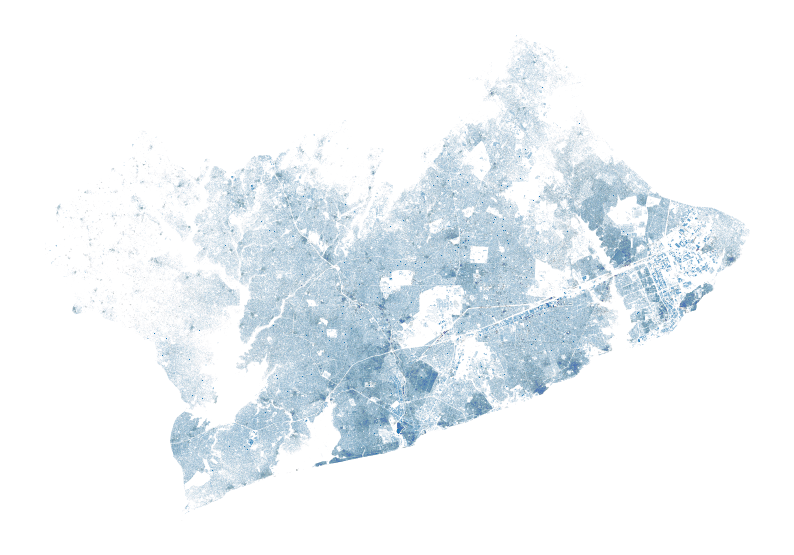

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
Acc_BF_h.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [22]:
Acc_BF_h.columns

Index(['Join_Count', 'TARGET_FID', 'latitude_x', 'longitude_x', 'area_in_me_x',
       'confidence_x', 'full_plus__x', 'layer_x', 'path_x', 'wsf_accra1_x',
       'geometry', 'uID', 'latitude_y', 'longitude_y', 'area_in_me_y',
       'confidence_y', 'full_plus__y', 'layer_y', 'path_y', 'ORIG_FID',
       'WSF_Accra_', 'wsf_accra1_y', 'A_3D', 'WSF3D_A', 'WSF3D_A_1', 'wsf_h'],
      dtype='object')

In [23]:
columns_to_drop = ['Join_Count','wsf_accra1_x',
        'latitude_y', 'longitude_y', 'area_in_me_y',
       'confidence_y', 'full_plus__y', 'layer_y', 'path_y', 'ORIG_FID',
       'WSF_Accra_', 'wsf_accra1_y', 'A_3D', 'WSF3D_A', 'WSF3D_A_1',]
Acc_BF_h = Acc_BF_h.drop(columns = columns_to_drop)
Acc_BF_h.head()

TARGET_FID  latitude_x  longitude_x  area_in_me_x  confidence_x  \
0           0    5.690601    -0.367710        9.3122        0.6959   
1           1    5.774509    -0.053495       70.8945        0.7786   
2           2    5.659148    -0.329165      134.3206        0.9137   
3           3    5.656320    -0.103304       50.4452        0.7740   
4           4    5.705059    -0.282356      139.7696        0.8939   

    full_plus__x      layer_x  \
0  6CQXMJRJ+6WV3  Accra_GOBF1   
1  6CQXQWFW+RJ26  Accra_GOBF1   
2  6CQXMM5C+M84W  Accra_GOBF1   
3  6CQXMV4W+GMGM  Accra_GOBF1   
4  6CQXPP49+23C8  Accra_GOBF1   

                                              path_x  \
0  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
2  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
3  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
4  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   

                                            geometry  uID  wsf_h  
0  POLYGON ((791577.042 629666.237, 791573.828 62...    0     58  
1  POLYGON ((826367.447 639126.101, 826360.199 63...    1     21  
2  POLYGON ((795870.602 626200.682, 795862.624 62...    2     33  
3  POLYGON ((820910.153 626010.943, 820901.649 62...    3     26  
4  POLYGON ((801037.755 631313.366, 801034.614 63...    4     28

In [24]:
missing_height_count = (Acc_BF_h['wsf_h']==-9999).sum()

# Display the count of missing height values
print(f"Number of missing height values: {missing_height_count}")

Number of missing height values: 59651


In [25]:
# Get indices of rows with -9999 value in 'wsf_h' column
indices_to_drop = Acc_BF_h[Acc_BF_h['wsf_h'] == -9999].index

# Display the indices
# print(f"Indices of rows with missing height values: {list(indices_to_drop)}")

# Drop these rows from the DataFrame
Acc_BF_h_cleaned = Acc_BF_h.drop(indices_to_drop)

# Verify the rows are dropped
# print(f"Number of rows after dropping: {Acc_BF_h_cleaned.shape[0]}")
Acc_BF_h_cleaned.shape

(2285571, 11)

In [26]:
Acc_BF_h.columns

Index(['TARGET_FID', 'latitude_x', 'longitude_x', 'area_in_me_x',
       'confidence_x', 'full_plus__x', 'layer_x', 'path_x', 'geometry', 'uID',
       'wsf_h'],
      dtype='object')

In [27]:
Acc_BF_h.head()

TARGET_FID  latitude_x  longitude_x  area_in_me_x  confidence_x  \
0           0    5.690601    -0.367710        9.3122        0.6959   
1           1    5.774509    -0.053495       70.8945        0.7786   
2           2    5.659148    -0.329165      134.3206        0.9137   
3           3    5.656320    -0.103304       50.4452        0.7740   
4           4    5.705059    -0.282356      139.7696        0.8939   

    full_plus__x      layer_x  \
0  6CQXMJRJ+6WV3  Accra_GOBF1   
1  6CQXQWFW+RJ26  Accra_GOBF1   
2  6CQXMM5C+M84W  Accra_GOBF1   
3  6CQXMV4W+GMGM  Accra_GOBF1   
4  6CQXPP49+23C8  Accra_GOBF1   

                                              path_x  \
0  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
2  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
3  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
4  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   

                                            geometry  uID  wsf_h  
0  POLYGON ((791577.042 629666.237, 791573.828 62...    0     58  
1  POLYGON ((826367.447 639126.101, 826360.199 63...    1     21  
2  POLYGON ((795870.602 626200.682, 795862.624 62...    2     33  
3  POLYGON ((820910.153 626010.943, 820901.649 62...    3     26  
4  POLYGON ((801037.755 631313.366, 801034.614 63...    4     28

In [28]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Assuming 'Acc_BF_h' is your GeoDataFrame with polygon geometries
# # Replace -9999 with NaN for better handling
# Acc_BF_h['wsf_h'].replace(-9999, pd.NA, inplace=True)

# # Filter the GeoDataFrame to only include rows with NaN in 'wsf_h'
# missing_height_gdf = Acc_BF_h[Acc_BF_h['wsf_h'].isna()]

# # Create a map plot
# missing_height_gdf.plot()

# # Add title
# plt.title('Spatial Distribution of Buildings Missing Height Attribute')

# # Show the plot
# plt.show()


In [29]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of your column
column_data = Acc_BF_h_cleaned['wsf_h']

# Calculate minimum value
min_value = column_data.min()
print ('the min value is', min_value)

# Calculate maximum value
max_value = column_data.max()
print ('the max value is', max_value)

# Calculate mean value
mean_value = column_data.mean()
print ('the mean value is', mean_value)

# Calculate median value
median_value = column_data.median()
print ('the median value is', median_value)

# Calculate standard deviation
std_dev = column_data.std()
print ('the std value is', std_dev)


the min value is 2
the max value is 1333
the mean value is 37.31066109956768
the median value is 32.0
the std value is 17.40052894293155


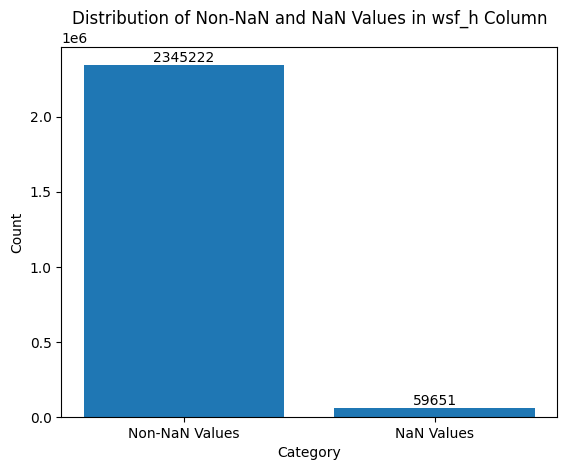

In [30]:
# Count the number of non-NaN entries
non_nan_count = Acc_BF_h['wsf_h'].count()

# Count the number of NaN entries
nan_count = (Acc_BF_h['wsf_h']==-9999).sum()

# Prepare data for the bar plot
data = {'Non-NaN Values': non_nan_count, 'NaN Values': nan_count}

# Create a bar plot
# plt.bar(data.keys(), data.values())

# Create a bar plot and store the returned objects in 'bars'
bars = plt.bar(data.keys(), data.values())


# Add title and labels
plt.title('Distribution of Non-NaN and NaN Values in wsf_h Column')
plt.xlabel('Category')
plt.ylabel('Count')

# Annotate bars with the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

# Show the plot
plt.show()


## DATA CLEANING

## handling missing height values 

In [31]:
missing_height_count = Acc_BF_h['wsf_h'].isna().sum()

# Display the count of missing height values
print(f"Number of missing height values: {missing_height_count}")

Number of missing height values: 0


In [32]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of your column
column_data = Acc_BF_h['wsf_h']

# Calculate minimum value
min_value = column_data.min()
print ('the min value is', min_value)

# Calculate maximum value
max_value = column_data.max()
print ('the max value is', max_value)

# Calculate mean value
mean_value = column_data.mean()
print ('the mean value is', mean_value)

# Calculate median value
median_value = column_data.median()
print ('the median value is', median_value)

# Calculate standard deviation
std_dev = column_data.std()
print ('the std value is', std_dev)


the min value is -9999
the max value is 1333
the mean value is -217.96409209874375
the median value is 32.0
the std value is 1580.2365864866147


In [33]:
# Display the rows where height is missing
rows_with_missing_height = Acc_BF_h[Acc_BF_h['wsf_h'].isna()]
print("\nRows with missing height values:")
print(rows_with_missing_height)


Rows with missing height values:
Empty GeoDataFrame
Columns: [TARGET_FID, latitude_x, longitude_x, area_in_me_x, confidence_x, full_plus__x, layer_x, path_x, geometry, uID, wsf_h]
Index: []


/usr/local/lib/python3.8/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


<AxesSubplot: >

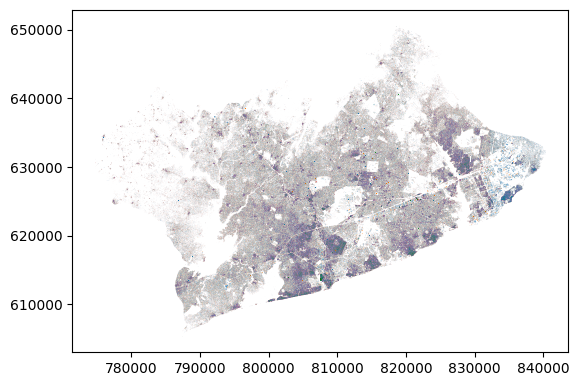

In [52]:
Acc_BF_h.plot(column = 'wsf_h')

In [34]:
# # Replace -999.9 (buildings without height) with the mean building height
# missing_values = -999.9

# # Calculate the mean building height excluding missing values
# mean_height = N_BF[N_BF['height'] != missing_values]['height'].mean()
# print(mean_height)


In [35]:
# # Replace null values with the mean building height
# N_BF['height'] = N_BF['height'].replace({missing_values: mean_height})
# print(N_BF)

In [36]:
# # Check for null values in the 'height' column
# null_values_exist = N_BF['height'].isnull().any()

# if null_values_exist:
#     print("Null values still exist in the 'height' column.")
# else:
#     print("No null values in the 'height' column.")

In [37]:
Acc_BF_h.to_file(path + 'Accra_bf_hgt_V1.shp')

/tmp/ipykernel_8305/2889865046.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Acc_BF_h.to_file(path + 'Accra_bf_hgt_V1.shp')


## Handling overlapping buildings

In [38]:
Acc_BF_h.geom_type.value_counts()

Polygon         2345206
MultiPolygon         16
dtype: int64

In [39]:
# exploring multipolygon features
multi_polygon_features = Acc_BF_h[Acc_BF_h.geom_type == 'MultiPolygon']

In [40]:
multi_polygon_features

TARGET_FID  latitude_x  longitude_x  area_in_me_x  confidence_x  \
354544       354544    5.581182    -0.263269      411.4475        0.8240   
446370       446370    5.586206    -0.206053       37.2926        0.7097   
463924       463924    5.718382    -0.130416       32.5556        0.7220   
475848       475848    5.559221    -0.186402      201.0756        0.8329   
483226       483226    5.782663    -0.234773      312.2892        0.7837   
496105       496105    5.707271    -0.025859      136.1656        0.7365   
758515       758515    5.689159    -0.235408      369.8263        0.7735   
926586       926586    5.555371    -0.182707      164.1214        0.7890   
1043248     1043248    5.556669    -0.266399      107.9557        0.6585   
1281175     1281175    5.767020    -0.353494      273.6732        0.9206   
1405601     1405601    5.568195    -0.186247      155.7964        0.8087   
1553034     1553034    5.645902    -0.495587      538.8862        0.8907   
1633003     1633003    5.544813    -0.197090      713.6504        0.8740   
1634371     1634371    5.791448    -0.184640      240.3141        0.8020   
1756745     1756745    5.605331    -0.253809      100.4317        0.6539   
1796618     1796618    5.766519    -0.370438      158.2676        0.8768   

          full_plus__x      layer_x  \
354544   6CQXHPJP+FMH7  Accra_GOBF1   
446370   6CQXHQPV+FHP7  Accra_GOBF1   
463924   6CQXPV99+9R48  Accra_GOBF1   
475848   6CQXHR57+MCQR  Accra_GOBF1   
483226   6CQXQQM8+339F  Accra_GOBF1   
496105   6CQXPX4F+WM2W  Accra_GOBF1   
758515   6CQXMQQ7+MR89  Accra_GOBF1   
926586   6CQXHR48+4WVV  Accra_GOBF1   
1043248  6CQXHP4M+MC9J  Accra_GOBF1   
1281175  6CQXQJ8W+RJ2J  Accra_GOBF1   
1405601  6CQXHR97+7GCJ  Accra_GOBF1   
1553034  6CQXJGW3+9Q72  Accra_GOBF1   
1633003  6CQXGRV3+W5FC  Accra_GOBF1   
1634371  6CQXQRR8+H4HW  Accra_GOBF1   
1756745  6CQXJP4W+4FP6  Accra_GOBF1   
1796618  6CQXQJ8H+JR3Q  Accra_GOBF1   

                                                    path_x  \
354544   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
446370   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
463924   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
475848   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
483226   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
496105   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
758515   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
926586   C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1043248  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1281175  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1405601  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1553034  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1633003  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1634371  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1756745  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   
1796618  C:/FACULTY_ITC/THESIS/Datasets/Building Footpr...   

                                                  geometry      uID  wsf_h  
354544   MULTIPOLYGON (((803225.863 617606.104, 803206....   354544     39  
446370   MULTIPOLYGON (((809553.715 618200.446, 809548....   446370     44  
463924   MULTIPOLYGON (((817868.398 632863.298, 817865....   463924     51  
475848   MULTIPOLYGON (((811751.931 615227.698, 811752....   475848     32  
483226   MULTIPOLYGON (((806259.138 639930.545, 806258....   483226     30  
496105   MULTIPOLYGON (((829464.784 631683.523, 829454....   496105     27  
758515   MULTIPOLYGON (((806252.222 629566.885, 806235....   758515     69  
926586   MULTIPOLYGON (((812150.083 614789.891, 812147....   926586    100  
1043248  MULTIPOLYGON (((802871.347 614893.867, 802865....  1043248     30  
1281175  MULTIPOLYGON (((793113.196 638124.776, 793108....  1281175     39  
1405601  MULTIPOLYGON (((811757.040 616205.320, 811748....  1405601     29  
1553034  MULTIPOLYGON (((777419.881 624655.873, 777420....  1553034     3

In [41]:
# Assuming multi_polygon_features is your GeoDataFrame with MultiPolygons
exploded_features = multi_polygon_features.explode()

# Create a new column to store the count of separate polygons
exploded_features['polygon_count'] = exploded_features.groupby(level=0).cumcount() + 1

# Display the count of separate polygons within each MultiPolygon
polygon_counts = exploded_features.groupby(level=0)['polygon_count'].max()
print(polygon_counts)


354544     2
446370     2
463924     2
475848     2
483226     2
496105     2
758515     2
926586     2
1043248    2
1281175    2
1405601    2
1553034    2
1633003    2
1634371    2
1756745    2
1796618    2
Name: polygon_count, dtype: int64


/tmp/ipykernel_8305/3337123914.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  exploded_features = multi_polygon_features.explode()


In [42]:
# explode the multipolygons to have the create individual building footprints
Acc_BF_h = Acc_BF_h.explode()
Acc_BF_h.geom_type.value_counts()

/tmp/ipykernel_8305/1006777083.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  Acc_BF_h = Acc_BF_h.explode()


Polygon    2345238
dtype: int64

In [43]:
Acc_BF_h.geometry = Acc_BF_h.buffer(0)
Acc_BF_h.geom_type.value_counts()

Polygon    2345238
dtype: int64

In [44]:
Acc_BF_h = Acc_BF_h[Acc_BF_h.geom_type == "Polygon"].reset_index(drop=True)
print(Acc_BF_h)

         TARGET_FID  latitude_x  longitude_x  area_in_me_x  confidence_x  \
0                 0    5.690601    -0.367710        9.3122        0.6959   
1                 1    5.774509    -0.053495       70.8945        0.7786   
2                 2    5.659148    -0.329165      134.3206        0.9137   
3                 3    5.656320    -0.103304       50.4452        0.7740   
4                 4    5.705059    -0.282356      139.7696        0.8939   
...             ...         ...          ...           ...           ...   
2345233     2345217    5.746298     0.186272       66.3565        0.7083   
2345234     2345218    5.778651     0.281725       18.3803        0.7827   
2345235     2345219    5.845970     0.031416       29.2708        0.7889   
2345236     2345220    6.075986     0.196558      164.3568        0.9143   
2345237     2345221    5.783499     0.632531       46.5593        0.7054   

          full_plus__x      layer_x  \
0        6CQXMJRJ+6WV3  Accra_GOBF1   
1        

In [46]:
Acc_BF_h.columns

Index(['TARGET_FID', 'latitude_x', 'longitude_x', 'area_in_me_x',
       'confidence_x', 'full_plus__x', 'layer_x', 'path_x', 'uID', 'wsf_h',
       'geometry'],
      dtype='object')

In [47]:
# Specify the columns of interest for new dataframe
columns_of_interest = ['area_in_me_x',
       'confidence_x', 'uID', 'wsf_h',
       'geometry']

# Select the specified columns from the original GeoDataFrame
Acc_BF_h = Acc_BF_h[columns_of_interest]


In [48]:
Acc_BF_h.head()

area_in_me_x  confidence_x  uID  wsf_h  \
0        9.3122        0.6959    0     58   
1       70.8945        0.7786    1     21   
2      134.3206        0.9137    2     33   
3       50.4452        0.7740    3     26   
4      139.7696        0.8939    4     28   

                                            geometry  
0  POLYGON ((791577.042 629666.237, 791573.828 62...  
1  POLYGON ((826367.447 639126.101, 826360.199 63...  
2  POLYGON ((795870.602 626200.682, 795862.624 62...  
3  POLYGON ((820910.153 626010.943, 820901.649 62...  
4  POLYGON ((801037.755 631313.366, 801034.614 63...

In [49]:
# # reprojecting cordinate system to a local/projected cordinate system (utm zone 37s) to facilities calculations
# N_BF = N_BF.to_crs('EPSG:32737')
# N_BF.crs

In [50]:
# # assign unique id to each row to cater for thr exploded buildings added.since after explotion, separated buildings tend to keep same attributes as the original multipolygon.
# import geopandas as gpd

# # Assuming 'Acc_BF' and 'centroids_dgf' are your GeoDataFrames

# # Assign unique numerical IDs to 'Acc_BF'
# Acc_BF['id'] = range(1, len(Acc_BF) + 1)

# # Assign unique numerical IDs to 'centroids_dgf'
# centroids_dgf['id'] = range(1, len(centroids_dgf) + 1)

# # Perform a spatial join to merge attributes from 'centroids_dgf' to 'Acc_BF' based on the common 'id'
# # Ensure that the 'id' in 'centroids_dgf' matches the 'id' in 'Acc_BF' for corresponding points
# joined_df = gpd.sjoin(Acc_BF, centroids_dgf, how='left', op='intersects')

# # 'joined_df' now contains combined data from both 'Acc_BF' and 'centroids_dgf' where their geometries intersect


In [51]:
Acc_BF_h.crs

<Derived Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [52]:
# save the cleaned version for later use and access

Acc_BF_h.to_file(path + 'Accra_bf_hgt_V1.shp')


/tmp/ipykernel_8305/153339780.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Acc_BF_h.to_file(path + 'Accra_bf_hgt_V1.shp')


### MS streets data cleaning



In [53]:
# N_Streets = gpd.read_file('Nairobi_streets.shp')

In [54]:
streets_gdf.head()

fid_1                                           geometry
0  395997.0  LINESTRING (787908.039 606717.341, 787853.501 ...
1  676922.0  LINESTRING (787908.039 606717.341, 787919.823 ...
2  648743.0  LINESTRING (788205.663 606394.827, 788267.438 ...
3  683465.0  LINESTRING (788682.505 606444.169, 788733.588 ...
4  651231.0  LINESTRING (789451.882 606794.960, 789472.075 ...

In [55]:
streets_gdf.crs

<Derived Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [56]:
len(streets_gdf)

114384

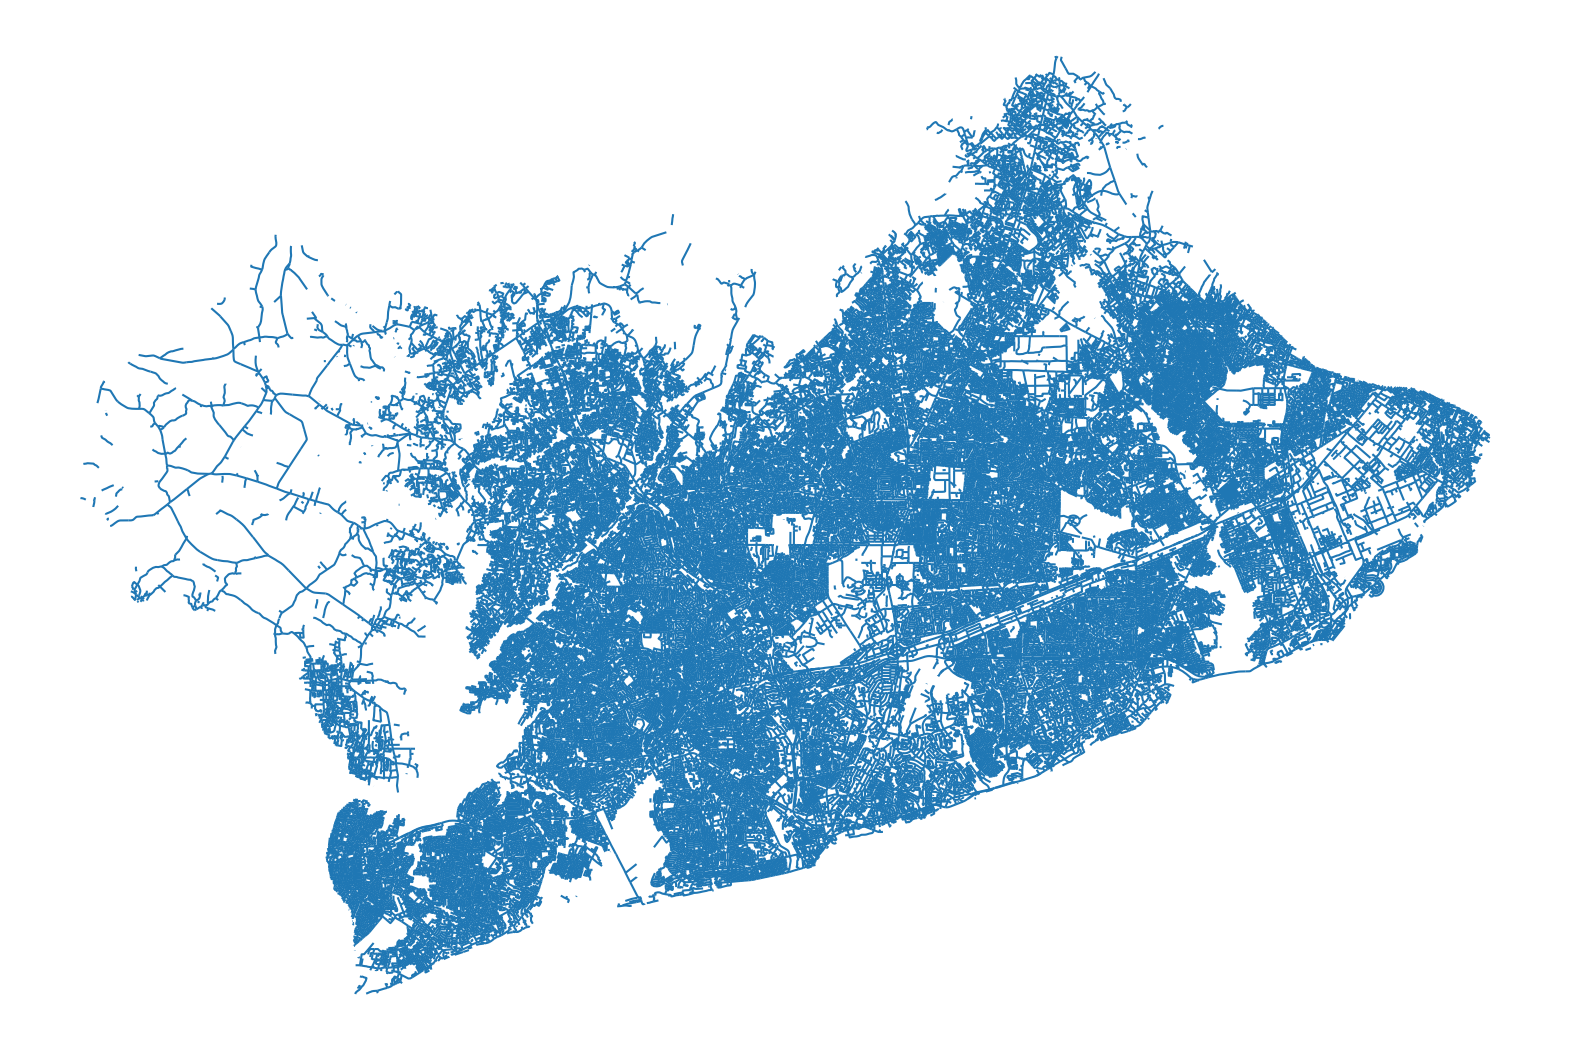

In [58]:
f, ax = plt.subplots(figsize=(20, 20))
streets_gdf.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [59]:
streets_gdf.geom_type.value_counts()

LineString         114371
MultiLineString        13
dtype: int64

In [60]:
# exploring multipolygon features
multiline_features = streets_gdf[streets_gdf.geom_type == 'MultiLineString']
multiline_features

fid_1                                           geometry
63     664015.0  MULTILINESTRING ((777815.269 624665.351, 77778...
569    558679.0  MULTILINESTRING ((786429.821 638764.506, 78645...
706    605732.0  MULTILINESTRING ((789649.549 638957.612, 78964...
2839   895027.0  MULTILINESTRING ((787218.829 610647.130, 78714...
4054   900438.0  MULTILINESTRING ((792969.767 608411.720, 79270...
12126  867134.0  MULTILINESTRING ((817793.072 647834.958, 81778...
63779  891421.0  MULTILINESTRING ((831757.263 622329.724, 83178...
64688  856503.0  MULTILINESTRING ((834156.477 624321.139, 83400...
68222  789409.0  MULTILINESTRING ((838145.001 633907.094, 83814...
97407  769026.0  MULTILINESTRING ((806601.370 636841.206, 80662...
97430  806248.0  MULTILINESTRING ((805439.325 637607.018, 80550...
99184  638764.0  MULTILINESTRING ((794155.984 639193.037, 79425...
99214  682188.0  MULTILINESTRING ((787460.975 638212.333, 78747...

In [61]:
missing_values=streets_gdf.isnull().any()
print(missing_values)

fid_1       False
geometry    False
dtype: bool


In [62]:
streets_gdf = mm.remove_false_nodes(streets_gdf)

In [63]:
len(streets_gdf)

114321

In [64]:
streets_gdf.isnull().any()

fid_1        True
geometry    False
dtype: bool

In [65]:
# Assuming 'streets_original' is your GeoDataFrame
nan_values = streets_gdf.isnull().sum()

# Print NaN values for each column
print("NaN Values in Each Column:")
print(nan_values)


NaN Values in Each Column:
fid_1       153
geometry      0
dtype: int64


In [66]:
# Display the rows where fid is NaN
NaN_fid = streets_gdf[streets_gdf['fid_1'].isnull()]
print(NaN_fid)

        fid_1                                           geometry
114168    NaN  LINESTRING (775897.627 634452.085, 776070.211 ...
114169    NaN  LINESTRING (776336.348 628073.173, 776365.184 ...
114170    NaN  LINESTRING (777175.029 635671.007, 777175.288 ...
114171    NaN  LINESTRING (778739.790 626203.920, 778674.425 ...
114172    NaN  LINESTRING (778144.014 633306.681, 778200.789 ...
...       ...                                                ...
114316    NaN  LINESTRING (833347.407 624752.485, 833354.246 ...
114317    NaN  LINESTRING (833354.246 624810.432, 833330.182 ...
114318    NaN  LINESTRING (836694.144 631340.891, 836735.937 ...
114319    NaN  LINESTRING (836762.008 628846.467, 836844.574 ...
114320    NaN  LINESTRING (836844.574 628755.900, 836972.659 ...

[153 rows x 2 columns]


In [67]:
#create a new dataframe withonly the geometry column
streets_gdf = streets_gdf[["geometry"]]
#assign a new index from 0 to length of street data -1
streets_gdf["nID"] = range(len(streets_gdf))

In [69]:
streets_gdf

geometry     nID
0       LINESTRING (787908.039 606717.341, 787853.501 ...       0
1       LINESTRING (787908.039 606717.341, 787919.823 ...       1
2       LINESTRING (788205.663 606394.827, 788267.438 ...       2
3       LINESTRING (788682.505 606444.169, 788733.588 ...       3
4       LINESTRING (789451.882 606794.960, 789472.075 ...       4
...                                                   ...     ...
114316  LINESTRING (833347.407 624752.485, 833354.246 ...  114316
114317  LINESTRING (833354.246 624810.432, 833330.182 ...  114317
114318  LINESTRING (836694.144 631340.891, 836735.937 ...  114318
114319  LINESTRING (836762.008 628846.467, 836844.574 ...  114319
114320  LINESTRING (836844.574 628755.900, 836972.659 ...  114320

[114321 rows x 2 columns]

In [70]:
# # reprojecting cordinate system to a local/projected cordinate system (utm zone 37s) to facilities calculations
# N_Streets = N_Streets[["geometry"]].to_crs('EPSG:32737')
streets_gdf.crs

<Derived Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
#save a cleaned version of the dataset
# output_file_path = '/data/private/momepy/N_Streets_V1.shp'
# output_file_path = '/data/private/momepy/N_Streets_V1.pq'
# Save the cleaned GeoDataFrame to the new file
streets_gdf.to_file(path_1 + 'A_Streets_V1.shp')

In [72]:
# N_streets = gpd.read_file('N_Streets_V1.shp')

In [73]:
# N_streets.crs

##preprocess the street network and eliminate unwanted gaps in the network and fix its topology.

In [74]:
#use close gaps to snap end points to end points

In [76]:
#close gaps
streets_gdf.geometry = mm.close_gaps(streets_gdf, .25)

In [77]:
len(streets_gdf)

114321

In [78]:
#use extend_lines to connect lines were there are gaps. use this in situation where your focus isnot to snap end points
streets_gdf = mm.extend_lines(streets_gdf, tolerance=.2)

In [79]:
len(streets_gdf)

114321

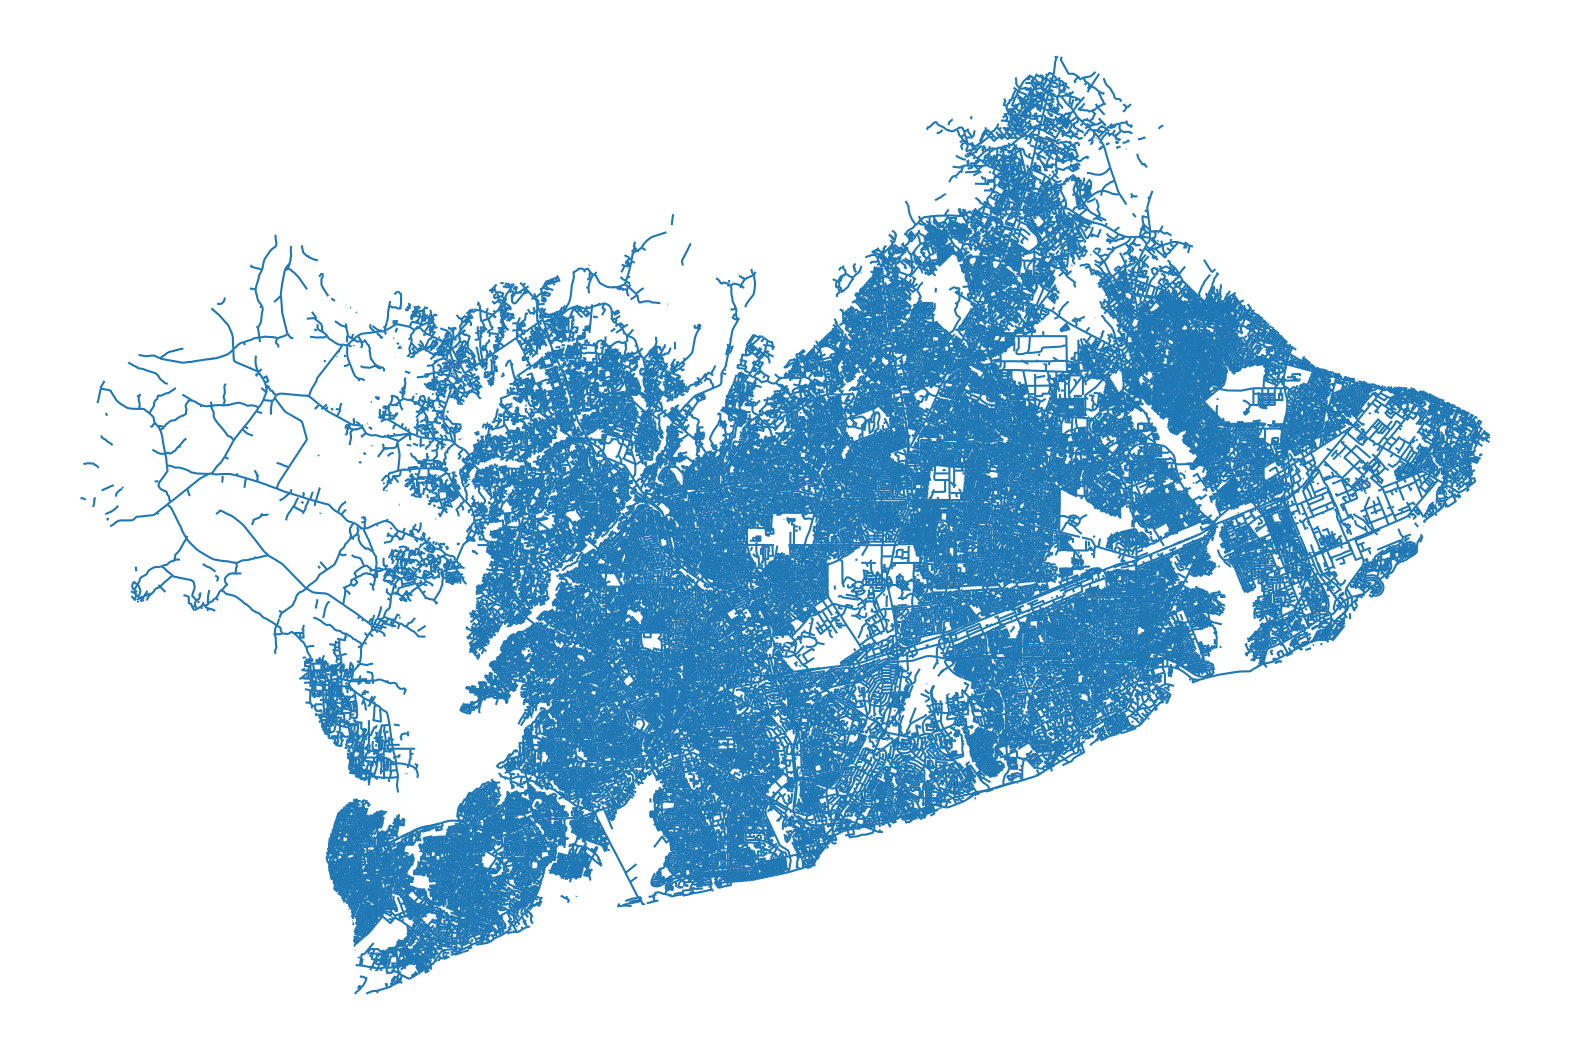

In [80]:
f, ax = plt.subplots(figsize=(20, 20))
streets_gdf.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [81]:
# Save the cleaned GeoDataFrame to the new file
streets_gdf.to_file(path_1 + 'A_Streets_V1.shp')

### Generate Morphological Tesselation( spatial Unit for Analysis)

In [82]:
# #load the cleaned datasets
# N_BF = gpd.read_file('N_BF_V1.shp')


In [83]:
len(Acc_BF_h)

2345238

In [84]:
Acc_BF_h.head()

area_in_me_x  confidence_x  uID  wsf_h  \
0        9.3122        0.6959    0     58   
1       70.8945        0.7786    1     21   
2      134.3206        0.9137    2     33   
3       50.4452        0.7740    3     26   
4      139.7696        0.8939    4     28   

                                            geometry  
0  POLYGON ((791577.042 629666.237, 791573.828 62...  
1  POLYGON ((826367.447 639126.101, 826360.199 63...  
2  POLYGON ((795870.602 626200.682, 795862.624 62...  
3  POLYGON ((820910.153 626010.943, 820901.649 62...  
4  POLYGON ((801037.755 631313.366, 801034.614 63...

In [85]:
Acc_BF_h.geom_type.value_counts()

Polygon    2345238
dtype: int64

In [86]:
#Check that data compatibility for tesselation
check = mm.CheckTessellationInput(Acc_BF_h)

/home/jovyan/.local/lib/python3.8/site-packages/pygeos/set_operations.py:129: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


Collapsed features  : 287
Split features      : 32
Overlapping features: 1196


In [87]:
# used to drop issues identified in building footprint dataset
#here 1066 buildings are dropped because issues
# need to figure out the best way to handle this without lossing a lot of data
Acc_BF_h = Acc_BF_h.drop(check.collapse.index.union(check.overlap.index).union(check.split.index))


In [88]:
len(Acc_BF_h)

2343723

In [89]:
Acc_BF_h.head()

area_in_me_x  confidence_x  uID  wsf_h  \
0        9.3122        0.6959    0     58   
1       70.8945        0.7786    1     21   
3       50.4452        0.7740    3     26   
4      139.7696        0.8939    4     28   
5       20.1172        0.7973    5     23   

                                            geometry  
0  POLYGON ((791577.042 629666.237, 791573.828 62...  
1  POLYGON ((826367.447 639126.101, 826360.199 63...  
3  POLYGON ((820910.153 626010.943, 820901.649 62...  
4  POLYGON ((801037.755 631313.366, 801034.614 63...  
5  POLYGON ((821373.596 622623.279, 821368.927 62...

In [90]:
# # assign unique id to each row to cater for thr exploded buildings added.since after explotion, separated buildings tend to keep same attributes as the original multipolygon.
# N_BF["uID"] = range(len(N_BF))
# N_BF.head()

In [91]:
#Check that data compatibility for tesselation
check = mm.CheckTessellationInput(Acc_BF_h)

Collapsed features  : 0
Split features      : 0
Overlapping features: 178736


In [92]:
Acc_BF_h = Acc_BF_h.drop(check.overlap.index)

In [93]:
len(Acc_BF_h)

2164987

In [94]:
#Check that data compatibility for tesselation
check = mm.CheckTessellationInput(Acc_BF_h)

Collapsed features  : 0
Split features      : 0
Overlapping features: 0


In [95]:
# save the cleaned version for later use and access

Acc_BF_h.to_file(path + 'Accra_bf_hgt_V2.shp')

/tmp/ipykernel_8305/4146317214.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Acc_BF_h.to_file(path + 'Accra_bf_hgt_V2.shp')


In [96]:
#create tessellation
# cleaned_N_BF = gpd.read_file('N_BF_V2.shp')

In [97]:
Acc_BF_h

area_in_me_x  confidence_x      uID  wsf_h  \
0              9.3122        0.6959        0     58   
1             70.8945        0.7786        1     21   
3             50.4452        0.7740        3     26   
4            139.7696        0.8939        4     28   
5             20.1172        0.7973        5     23   
...               ...           ...      ...    ...   
2345233       66.3565        0.7083  2345217     28   
2345234       18.3803        0.7827  2345218  -9999   
2345235       29.2708        0.7889  2345219     30   
2345236      164.3568        0.9143  2345220  -9999   
2345237       46.5593        0.7054  2345221  -9999   

                                                  geometry  
0        POLYGON ((791577.042 629666.237, 791573.828 62...  
1        POLYGON ((826367.447 639126.101, 826360.199 63...  
3        POLYGON ((820910.153 626010.943, 820901.649 62...  
4        POLYGON ((801037.755 631313.366, 801034.614 63...  
5        POLYGON ((821373.596 622623.279, 821368.927 62...  
...                                                    ...  
2345233  POLYGON ((835855.062 625998.963, 835851.884 62...  
2345234  POLYGON ((832547.547 633286.349, 832544.120 63...  
2345235  POLYGON ((834104.347 633291.406, 834101.387 63...  
2345236  POLYGON ((837062.308 632320.418, 837054.285 63...  
2345237  POLYGON ((832603.586 623990.029, 832592.423 62...  

[2164987 rows x 5 columns]

In [98]:
Acc_BF_h.geom_type.value_counts()

Polygon    2164987
dtype: int64

In [99]:
Acc_BF_h.crs

<Derived Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
#Check that data compatibility for tesselation
check = mm.CheckTessellationInput(Acc_BF_h)

Collapsed features  : 0
Split features      : 0
Overlapping features: 0


In [ ]:
# generate tessselation using a buffer of 100m around all building footprints
limit = mm.buffered_limit(Acc_BF_h, 100)
tessellation = mm.Tessellation(Acc_BF_h, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation

In [63]:
tessellation.head(5)

uID                                           geometry
396402  431260  POLYGON ((273015.419 9840919.545, 273086.359 9...
680333  740286  POLYGON ((265608.399 9843726.329, 265611.032 9...
450903  490551  POLYGON ((251512.171 9846768.106, 251537.773 9...
66071    71958  POLYGON ((249482.718 9847023.289, 249500.810 9...
544608  592454  POLYGON ((248621.314 9847365.456, 248628.536 9...

In [64]:
tessellation

uID                                           geometry
396402  431260  POLYGON ((273015.419 9840919.545, 273086.359 9...
680333  740286  POLYGON ((265608.399 9843726.329, 265611.032 9...
450903  490551  POLYGON ((251512.171 9846768.106, 251537.773 9...
66071    71958  POLYGON ((249482.718 9847023.289, 249500.810 9...
544608  592454  POLYGON ((248621.314 9847365.456, 248628.536 9...
...        ...                                                ...
281008  305604  POLYGON ((268422.233 9871699.076, 268421.098 9...
32485    35362  POLYGON ((268291.603 9871729.005, 268288.612 9...
361095  392852  POLYGON ((268142.025 9871787.278, 268141.945 9...
362472  394353  POLYGON ((268135.383 9871895.766, 268118.257 9...
116874  127132  POLYGON ((266698.968 9871892.204, 266697.801 9...

[759037 rows x 2 columns]

In [65]:
# Resetting the index to start from 0
tessellation = tessellation.reset_index(drop=True)
tessellation

uID                                           geometry
0       431260  POLYGON ((273015.419 9840919.545, 273086.359 9...
1       740286  POLYGON ((265608.399 9843726.329, 265611.032 9...
2       490551  POLYGON ((251512.171 9846768.106, 251537.773 9...
3        71958  POLYGON ((249482.718 9847023.289, 249500.810 9...
4       592454  POLYGON ((248621.314 9847365.456, 248628.536 9...
...        ...                                                ...
759032  305604  POLYGON ((268422.233 9871699.076, 268421.098 9...
759033   35362  POLYGON ((268291.603 9871729.005, 268288.612 9...
759034  392852  POLYGON ((268142.025 9871787.278, 268141.945 9...
759035  394353  POLYGON ((268135.383 9871895.766, 268118.257 9...
759036  127132  POLYGON ((266698.968 9871892.204, 266697.801 9...

[759037 rows x 2 columns]

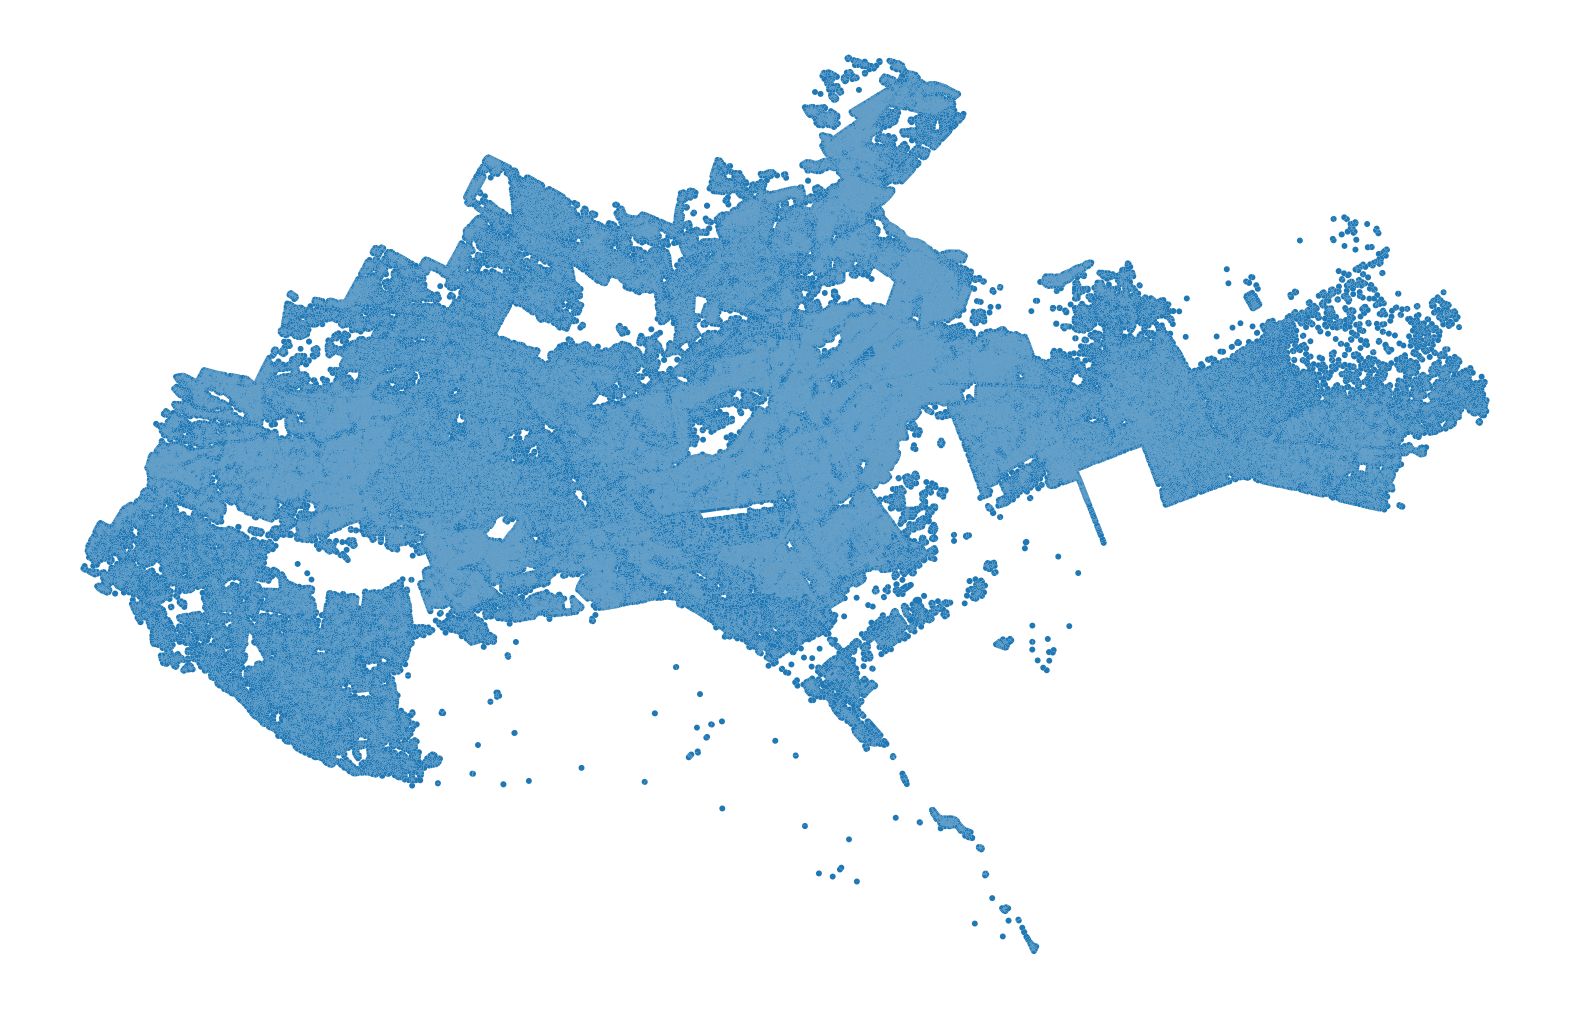

In [51]:
f, ax = plt.subplots(figsize=(20, 20))
tessellation.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [57]:
tessellation.crs

<Derived Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
# save the cleaned version for later use and access

# Assuming gdf is your cleaned GeoDataFrame
# Specify the absolute file path and format for the new version
output_file_path = '/home/jovyan/private/Thesis/Accra/tessellation/'

# Save the cleaned GeoDataFrame to the new file
tessellation.to_file(output_file_path + 'tessellation.shp' )

In [3]:
#create tessellation
Buildings = gpd.read_file(path + 'Accra_bf_hgt_V2.shp')
Streets = gpd.read_file(path_1 + 'A_Streets_V1.shp')
Tessellation = gpd.read_file(path_2 + 'tessellation.shp')

In [22]:
Buildings = gpd.read_file(path + 'Accra_bf_hgt_V2.shp')

In [23]:
Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0     58   
1           70.8945      0.7786        1     21   
2           50.4452      0.7740        3     26   
3          139.7696      0.8939        4     28   
4           20.1172      0.7973        5     23   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217     28   
2164983     18.3803      0.7827  2345218  -9999   
2164984     29.2708      0.7889  2345219     30   
2164985    164.3568      0.9143  2345220  -9999   
2164986     46.5593      0.7054  2345221  -9999   

                                                  geometry  
0        POLYGON ((791577.042 629666.237, 791573.828 62...  
1        POLYGON ((826367.447 639126.101, 826360.199 63...  
2        POLYGON ((820910.153 626010.943, 820901.649 62...  
3        POLYGON ((801037.755 631313.366, 801034.614 63...  
4        POLYGON ((821373.596 622623.279, 821368.927 62...  
...                                                    ...  
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...  
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...  
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...  
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...  
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...  

[2164987 rows x 5 columns]

In [25]:
# Count the number of rows with -9999 in the 'wsf_h' column
count = (Buildings['wsf_h'] == -9999).sum()
print(f"The number of rows with -9999 is: {count}")


The number of rows with -9999 is: 55047


In [27]:
print(Buildings['wsf_h'].unique())


[  58.   21.   26.   28.   23.   34.   22.   27.   39.   24.   31.   29.
   20.   35.   33.   30.  107.   25.   42.   32.   68.   nan  121.   50.
   40.   57.   45.   54.   41.   43.   48.   62.   87.   38.   53.   56.
   60.   37.   47.   36.   63.   72.   77.   49.   46.   73.   59.   51.
   71.   82.   85.   66.   44.   61.  141.   55.   91.   86.   65.   75.
   52.  137.  146.   64.   79.   93.  105.   92.  169.   78.   80.   81.
   69.   88.  101.   76.   70.   83.   67.  118.   89.   84.   74.  102.
  113.  172.   97.  133.   90.   94.   95.  126.  114.  103.   98.  150.
  109.   96.  145.  177.    2.  219.  151.  106.  115.  138.  217.  100.
  119.   99.  112.  192.  152.  110.  240.  167.  136.  111.  120.  117.
  170.    3.  124.  135.  148.  195.  127.  122.  147.  108.  116.  104.
  139.  123.  162.  163.  129.  184.  202.  196.  164.  179.  125.  209.
  181.  266.  155.  130.  132.  154.  134.  188.  199.  231.  203.  142.
  144.  210.  411.  246.  165.  149.  427.  234.  2

In [26]:
# Convert the 'wsf_h' column to float, just in case it's stored as a string
# Buildings['wsf_h'] = Buildings['wsf_h'].astype(float)

# Replace -999.9 with NaN in the 'wsf_h' column
Buildings['wsf_h'].replace(-9999, np.nan, inplace=True)


Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0   58.0   
1           70.8945      0.7786        1   21.0   
2           50.4452      0.7740        3   26.0   
3          139.7696      0.8939        4   28.0   
4           20.1172      0.7973        5   23.0   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217   28.0   
2164983     18.3803      0.7827  2345218    NaN   
2164984     29.2708      0.7889  2345219   30.0   
2164985    164.3568      0.9143  2345220    NaN   
2164986     46.5593      0.7054  2345221    NaN   

                                                  geometry  
0        POLYGON ((791577.042 629666.237, 791573.828 62...  
1        POLYGON ((826367.447 639126.101, 826360.199 63...  
2        POLYGON ((820910.153 626010.943, 820901.649 62...  
3        POLYGON ((801037.755 631313.366, 801034.614 63...  
4        POLYGON ((821373.596 622623.279, 821368.927 62...  
...                                                    ...  
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...  
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...  
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...  
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...  
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...  

[2164987 rows x 5 columns]

In [28]:
# Assuming 'building' is your DataFrame and 'wsf_h' is the column of interest
Buildings['wsf_h'] = Buildings['wsf_h'] * 0.1
Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0    5.8   
1           70.8945      0.7786        1    2.1   
2           50.4452      0.7740        3    2.6   
3          139.7696      0.8939        4    2.8   
4           20.1172      0.7973        5    2.3   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217    2.8   
2164983     18.3803      0.7827  2345218    NaN   
2164984     29.2708      0.7889  2345219    3.0   
2164985    164.3568      0.9143  2345220    NaN   
2164986     46.5593      0.7054  2345221    NaN   

                                                  geometry  
0        POLYGON ((791577.042 629666.237, 791573.828 62...  
1        POLYGON ((826367.447 639126.101, 826360.199 63...  
2        POLYGON ((820910.153 626010.943, 820901.649 62...  
3        POLYGON ((801037.755 631313.366, 801034.614 63...  
4        POLYGON ((821373.596 622623.279, 821368.927 62...  
...                                                    ...  
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...  
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...  
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...  
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...  
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...  

[2164987 rows x 5 columns]

In [29]:
# Check for NaN values in the 'wsf_h' column
print(Buildings['wsf_h'].isna().sum())


55047


In [30]:
# Replace NaN values in the 'wsf_h' column with 3.7
Buildings['wsf_h'].fillna(3.7, inplace=True)
Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0    5.8   
1           70.8945      0.7786        1    2.1   
2           50.4452      0.7740        3    2.6   
3          139.7696      0.8939        4    2.8   
4           20.1172      0.7973        5    2.3   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217    2.8   
2164983     18.3803      0.7827  2345218    3.7   
2164984     29.2708      0.7889  2345219    3.0   
2164985    164.3568      0.9143  2345220    3.7   
2164986     46.5593      0.7054  2345221    3.7   

                                                  geometry  
0        POLYGON ((791577.042 629666.237, 791573.828 62...  
1        POLYGON ((826367.447 639126.101, 826360.199 63...  
2        POLYGON ((820910.153 626010.943, 820901.649 62...  
3        POLYGON ((801037.755 631313.366, 801034.614 63...  
4        POLYGON ((821373.596 622623.279, 821368.927 62...  
...                                                    ...  
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...  
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...  
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...  
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...  
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...  

[2164987 rows x 5 columns]

In [31]:
Buildings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2164987 entries, 0 to 2164986
Data columns (total 5 columns):
 #   Column      Dtype   
---  ------      -----   
 0   area_in_me  float64 
 1   confidence  float64 
 2   uID         int64   
 3   wsf_h       float64 
 4   geometry    geometry
dtypes: float64(3), geometry(1), int64(1)
memory usage: 82.6 MB


In [32]:
# save the cleaned version for later use and access

Buildings.to_file(path + 'Accra_bf_hgt_V2.shp')

In [33]:
Streets

nID                                           geometry
0            0  LINESTRING (787908.039 606717.341, 787853.501 ...
1            1  LINESTRING (787908.039 606717.341, 787919.823 ...
2            2  LINESTRING (788729.731 606527.099, 788602.475 ...
3            3  LINESTRING (788729.731 606527.099, 788739.443 ...
4            4  LINESTRING (789451.882 606794.960, 789472.075 ...
...        ...                                                ...
114316  114316  LINESTRING (833347.407 624752.485, 833354.246 ...
114317  114317  LINESTRING (833354.246 624810.432, 833330.182 ...
114318  114318  LINESTRING (836694.144 631340.891, 836735.937 ...
114319  114319  LINESTRING (836762.008 628846.467, 836844.574 ...
114320  114320  LINESTRING (836844.574 628755.900, 836972.659 ...

[114321 rows x 2 columns]

In [34]:
Tessellation

uID                                           geometry
0        1441336  POLYGON ((787361.875 605291.499, 787463.989 60...
1        1577222  POLYGON ((777267.492 624833.060, 777268.494 62...
2        1390470  POLYGON ((787344.733 605291.019, 787345.055 60...
3        2203509  POLYGON ((787451.306 606067.563, 787452.322 60...
4        1525988  POLYGON ((786678.173 611236.836, 786672.863 61...
...          ...                                                ...
2164964   246415  POLYGON ((808092.281 635976.107, 808076.384 63...
2164965   539245  POLYGON ((808130.576 636022.764, 808129.256 63...
2164966   982201  POLYGON ((808107.669 636126.162, 808107.794 63...
2164967   974056  POLYGON ((808251.751 636223.307, 808250.690 63...
2164968     1376  POLYGON ((819031.722 650671.140, 819037.475 65...

[2164969 rows x 2 columns]

#Link unique IDs of streets to buildings and tessellation cells based on the nearest neighbor join.

In [35]:
Buildings = Buildings.sjoin_nearest(Streets, max_distance=1000, how="left")
Buildings.head()

area_in_me  confidence  uID  wsf_h  \
0      9.3122      0.6959    0    5.8   
1     70.8945      0.7786    1    2.1   
2     50.4452      0.7740    3    2.6   
3    139.7696      0.8939    4    2.8   
4     20.1172      0.7973    5    2.3   

                                            geometry  index_right       nID  
0  POLYGON ((791577.042 629666.237, 791573.828 62...      83732.0   83732.0  
1  POLYGON ((826367.447 639126.101, 826360.199 63...      57174.0   57174.0  
2  POLYGON ((820910.153 626010.943, 820901.649 62...     101531.0  101531.0  
3  POLYGON ((801037.755 631313.366, 801034.614 63...      85280.0   85280.0  
4  POLYGON ((821373.596 622623.279, 821368.927 62...      71997.0   71997.0

In [36]:
#check for duplicates uid
duplicate_uids = Buildings[Buildings.duplicated("uID", keep=False)]["uID"].unique()

if len(duplicate_uids) > 0:
    print("Duplicate uID values found:")
    print(duplicate_uids)
    # You can decide how to handle duplicates based on your specific needs
else:
    print("No duplicate uID values found.")


Duplicate uID values found:
[     44     304     442 ... 2343439 2343679 2343832]


In [37]:
duplicate_count = Buildings.duplicated("uID").sum()

print(f"Number of duplicate uID values: {duplicate_count}")


Number of duplicate uID values: 13936


In [38]:
len(Buildings)

2178913

In [39]:
# drop duplicate uIDs
Buildings = Buildings.drop_duplicates("uID").drop(columns="index_right")

In [40]:
#check for duplicates uid
duplicate_uids = Buildings[Buildings.duplicated("uID", keep=False)]["uID"].unique()

if len(duplicate_uids) > 0:
    print("Duplicate uID values found:")
    print(duplicate_uids)
    # You can decide how to handle duplicates based on your specific needs
else:
    print("No duplicate uID values found.")


No duplicate uID values found.


In [41]:
len(Buildings)

2164977

In [42]:
Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0    5.8   
1           70.8945      0.7786        1    2.1   
2           50.4452      0.7740        3    2.6   
3          139.7696      0.8939        4    2.8   
4           20.1172      0.7973        5    2.3   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217    2.8   
2164983     18.3803      0.7827  2345218    3.7   
2164984     29.2708      0.7889  2345219    3.0   
2164985    164.3568      0.9143  2345220    3.7   
2164986     46.5593      0.7054  2345221    3.7   

                                                  geometry       nID  
0        POLYGON ((791577.042 629666.237, 791573.828 62...   83732.0  
1        POLYGON ((826367.447 639126.101, 826360.199 63...   57174.0  
2        POLYGON ((820910.153 626010.943, 820901.649 62...  101531.0  
3        POLYGON ((801037.755 631313.366, 801034.614 63...   85280.0  
4        POLYGON ((821373.596 622623.279, 821368.927 62...   71997.0  
...                                                    ...       ...  
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...   64007.0  
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...   65536.0  
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...   66572.0  
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...   67834.0  
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...   63677.0  

[2164977 rows x 6 columns]

In [43]:
# save the cleaned version for later use and access

Buildings.to_file(path + 'Accra_bf_hgt_V3.shp')

In [47]:
# Check for duplicates in the 'uID' column
duplicate_rows = Buildings.duplicated(subset=['uID'], keep=False)
print(f"Number of duplicate 'uID' values: {sum(duplicate_rows)}")


Number of duplicate 'uID' values: 0


In [48]:
# Check for duplicates in the 'uID' column
Tessellation_duplicate_rows = Tessellation.duplicated(subset=['uID'], keep=False)
print(f"Number of duplicate 'uID' values: {sum(Tessellation_duplicate_rows)}")


Number of duplicate 'uID' values: 0


In [49]:
Buildings.shape, Tessellation.shape

((2164977, 6), (2164969, 2))

In [66]:
Buildings.rename(columns={'FID': 'uID'}, inplace=True)
Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0    5.8   
1           70.8945      0.7786        1    2.1   
2           50.4452      0.7740        3    2.6   
3          139.7696      0.8939        4    2.8   
4           20.1172      0.7973        5    2.3   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217    2.8   
2164983     18.3803      0.7827  2345218    3.7   
2164984     29.2708      0.7889  2345219    3.0   
2164985    164.3568      0.9143  2345220    3.7   
2164986     46.5593      0.7054  2345221    3.7   

                                                  geometry       nID  
0        POLYGON ((791577.042 629666.237, 791573.828 62...   83732.0  
1        POLYGON ((826367.447 639126.101, 826360.199 63...   57174.0  
2        POLYGON ((820910.153 626010.943, 820901.649 62...  101531.0  
3        POLYGON ((801037.755 631313.366, 801034.614 63...   85280.0  
4        POLYGON ((821373.596 622623.279, 821368.927 62...   71997.0  
...                                                    ...       ...  
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...   64007.0  
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...   65536.0  
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...   66572.0  
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...   67834.0  
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...   63677.0  

[2164977 rows x 6 columns]

In [67]:
Tessellation

uID                                           geometry
0        1441336  POLYGON ((787361.875 605291.499, 787463.989 60...
1        1577222  POLYGON ((777267.492 624833.060, 777268.494 62...
2        1390470  POLYGON ((787344.733 605291.019, 787345.055 60...
3        2203509  POLYGON ((787451.306 606067.563, 787452.322 60...
4        1525988  POLYGON ((786678.173 611236.836, 786672.863 61...
...          ...                                                ...
2164964   246415  POLYGON ((808092.281 635976.107, 808076.384 63...
2164965   539245  POLYGON ((808130.576 636022.764, 808129.256 63...
2164966   982201  POLYGON ((808107.669 636126.162, 808107.794 63...
2164967   974056  POLYGON ((808251.751 636223.307, 808250.690 63...
2164968     1376  POLYGON ((819031.722 650671.140, 819037.475 65...

[2164969 rows x 2 columns]

In [68]:
Tessellation.columns, Buildings.columns

(Index(['uID', 'geometry'], dtype='object'),
 Index(['area_in_me', 'confidence', 'uID', 'wsf_h', 'geometry', 'nID'], dtype='object'))

In [69]:
# Perform the merge operation
tessellation = Tessellation.merge(Buildings[['uID', 'nID']], on='uID', how='left')

In [70]:
tessellation

uID                                           geometry      nID
0        1441336  POLYGON ((787361.875 605291.499, 787463.989 60...      NaN
1        1577222  POLYGON ((777267.492 624833.060, 777268.494 62...     78.0
2        1390470  POLYGON ((787344.733 605291.019, 787345.055 60...      NaN
3        2203509  POLYGON ((787451.306 606067.563, 787452.322 60...     14.0
4        1525988  POLYGON ((786678.173 611236.836, 786672.863 61...  20895.0
...          ...                                                ...      ...
2164964   246415  POLYGON ((808092.281 635976.107, 808076.384 63...  97206.0
2164965   539245  POLYGON ((808130.576 636022.764, 808129.256 63...  97206.0
2164966   982201  POLYGON ((808107.669 636126.162, 808107.794 63...  97197.0
2164967   974056  POLYGON ((808251.751 636223.307, 808250.690 63...  97198.0
2164968     1376  POLYGON ((819031.722 650671.140, 819037.475 65...      NaN

[2164969 rows x 3 columns]

In [71]:
# Check for NaN values in the 'wsf_h' column
print(Buildings['nID'].isna().sum())

299


In [72]:
# save the cleaned version for later use and access

# Assuming gdf is your cleaned GeoDataFrame
# Specify the absolute file path and format for the new version
output_file_path = '/home/jovyan/private/Thesis/Accra/tessellation/'

# Save the cleaned GeoDataFrame to the new file
tessellation.to_file(output_file_path + 'tessellation_V1.shp' )

In [73]:
blg_area = mm.Area(Buildings)
Buildings['area'] = blg_area.series

In [74]:
Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0    5.8   
1           70.8945      0.7786        1    2.1   
2           50.4452      0.7740        3    2.6   
3          139.7696      0.8939        4    2.8   
4           20.1172      0.7973        5    2.3   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217    2.8   
2164983     18.3803      0.7827  2345218    3.7   
2164984     29.2708      0.7889  2345219    3.0   
2164985    164.3568      0.9143  2345220    3.7   
2164986     46.5593      0.7054  2345221    3.7   

                                                  geometry       nID  \
0        POLYGON ((791577.042 629666.237, 791573.828 62...   83732.0   
1        POLYGON ((826367.447 639126.101, 826360.199 63...   57174.0   
2        POLYGON ((820910.153 626010.943, 820901.649 62...  101531.0   
3        POLYGON ((801037.755 631313.366, 801034.614 63...   85280.0   
4        POLYGON ((821373.596 622623.279, 821368.927 62...   71997.0   
...                                                    ...       ...   
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...   64007.0   
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...   65536.0   
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...   66572.0   
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...   67834.0   
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...   63677.0   

               area  
0          9.283862  
1         70.716852  
2         50.314099  
3        139.364102  
4         20.065097  
...             ...  
2164982   49.276914  
2164983    9.228296  
2164984    8.824303  
2164985   70.337969  
2164986  164.919347  

[2164977 rows x 7 columns]

In [75]:
#extend streets to the limits created to create street blocks. 
limit = mm.buffered_limit(Buildings, 100)
extended = mm.extend_lines(Streets, tolerance=120, target=gpd.GeoSeries([limit.boundary]), barrier=Buildings)

In [76]:
#create blocks dataframe
blocks = mm.Blocks(Tessellation, edges=extended, buildings=Buildings, id_name='bID', unique_id='uID')
blocks_df = blocks.blocks  # get blocks df

In [77]:
blocks_df.head()

bID                                           geometry
0    0  POLYGON ((787572.031 605263.464, 787570.377 60...
1    1  POLYGON ((777247.090 624714.142, 777240.740 62...
2    2  POLYGON ((787659.519 605733.175, 787655.974 60...
3    3  POLYGON ((787987.088 608917.122, 787988.051 60...
4    4  POLYGON ((788371.800 608379.179, 788372.414 60...

In [78]:
# save block dataframe
# Specify the absolute file path and format for the new version
output_file_path = '/home/jovyan/private/Thesis/Accra/street_blocks/'

# Save the cleaned GeoDataFrame to the new file
blocks_df.to_file(output_file_path + 'blocks_df.shp')

In [82]:
#get block ID on buildings and tessellation dataframes
Buildings['bID'] = blocks.buildings_id.values  # get block ID
tessellation['bID'] = blocks.tessellation_id.values  # get block ID

In [83]:
Buildings

area_in_me  confidence      uID  wsf_h  \
0            9.3122      0.6959        0    5.8   
1           70.8945      0.7786        1    2.1   
2           50.4452      0.7740        3    2.6   
3          139.7696      0.8939        4    2.8   
4           20.1172      0.7973        5    2.3   
...             ...         ...      ...    ...   
2164982     66.3565      0.7083  2345217    2.8   
2164983     18.3803      0.7827  2345218    3.7   
2164984     29.2708      0.7889  2345219    3.0   
2164985    164.3568      0.9143  2345220    3.7   
2164986     46.5593      0.7054  2345221    3.7   

                                                  geometry       nID  \
0        POLYGON ((791577.042 629666.237, 791573.828 62...   83732.0   
1        POLYGON ((826367.447 639126.101, 826360.199 63...   57174.0   
2        POLYGON ((820910.153 626010.943, 820901.649 62...  101531.0   
3        POLYGON ((801037.755 631313.366, 801034.614 63...   85280.0   
4        POLYGON ((821373.596 622623.279, 821368.927 62...   71997.0   
...                                                    ...       ...   
2164982  POLYGON ((835855.062 625998.963, 835851.884 62...   64007.0   
2164983  POLYGON ((832547.547 633286.349, 832544.120 63...   65536.0   
2164984  POLYGON ((834104.347 633291.406, 834101.387 63...   66572.0   
2164985  POLYGON ((837062.308 632320.418, 837054.285 63...   67834.0   
2164986  POLYGON ((832603.586 623990.029, 832592.423 62...   63677.0   

               area      bID  
0          9.283862   8458.0  
1         70.716852  30173.0  
2         50.314099  21172.0  
3        139.364102   9767.0  
4         20.065097  17230.0  
...             ...      ...  
2164982   49.276914  15495.0  
2164983    9.228296  24292.0  
2164984    8.824303  24197.0  
2164985   70.337969  23230.0  
2164986  164.919347  15579.0  

[2164977 rows x 8 columns]

In [85]:
tessellation

uID                                           geometry      nID  \
0        1441336  POLYGON ((787361.875 605291.499, 787463.989 60...      NaN   
1        1577222  POLYGON ((777267.492 624833.060, 777268.494 62...     78.0   
2        1390470  POLYGON ((787344.733 605291.019, 787345.055 60...      NaN   
3        2203509  POLYGON ((787451.306 606067.563, 787452.322 60...     14.0   
4        1525988  POLYGON ((786678.173 611236.836, 786672.863 61...  20895.0   
...          ...                                                ...      ...   
2164964   246415  POLYGON ((808092.281 635976.107, 808076.384 63...  97206.0   
2164965   539245  POLYGON ((808130.576 636022.764, 808129.256 63...  97206.0   
2164966   982201  POLYGON ((808107.669 636126.162, 808107.794 63...  97197.0   
2164967   974056  POLYGON ((808251.751 636223.307, 808250.690 63...  97198.0   
2164968     1376  POLYGON ((819031.722 650671.140, 819037.475 65...      NaN   

             bID  
0            0.0  
1            1.0  
2            0.0  
3            2.0  
4           11.0  
...          ...  
2164964  12100.0  
2164965  12100.0  
2164966  12100.0  
2164967  12100.0  
2164968  30200.0  

[2164969 rows x 4 columns]

In [86]:
# save the cleaned version for later use and access

# Assuming gdf is your cleaned GeoDataFrame
# Specify the absolute file path and format for the new version
output_file_path = '/home/jovyan/private/Thesis/Accra/tessellation/'

# Save the cleaned GeoDataFrame to the new file
tessellation.to_file(output_file_path + 'tessellation_V1.shp' )

In [87]:
# save the cleaned version for later use and access

Buildings.to_file(path + 'Accra_bf_hgt_V3.shp')

In [ ]:
###  cleaned data achieved 
 #cleeaned building footprints == N_BF_V3
 #cleaned streets ==N_Streets_V2
 #generated tessellation == tessellation_V1 
 huuurrrraayyyyyyyyyyyyyyyyyyyyyyyyyyyyy